In [2]:
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
from matplotlib import pyplot as plt

In [3]:
import GPy
import numpy as np

In [4]:
ker1 = GPy.kern.RBF(1)  # Equivalent to ker1 = GPy.kern.rbf(input_dim=1, variance=1., lengthscale=1.)
ker2 = GPy.kern.RBF(input_dim=1, variance = .75, lengthscale=2.)
ker3 = GPy.kern.RBF(1, .5, .5)

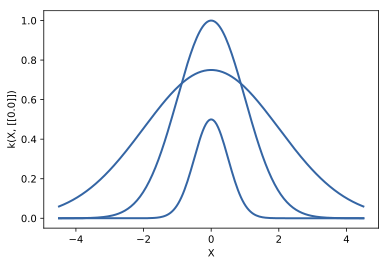

In [7]:
_ = ker1.plot(ax=plt.gca())
_ = ker2.plot(ax=plt.gca())
_ = ker3.plot(ax=plt.gca())

 /Users/jingxixu/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


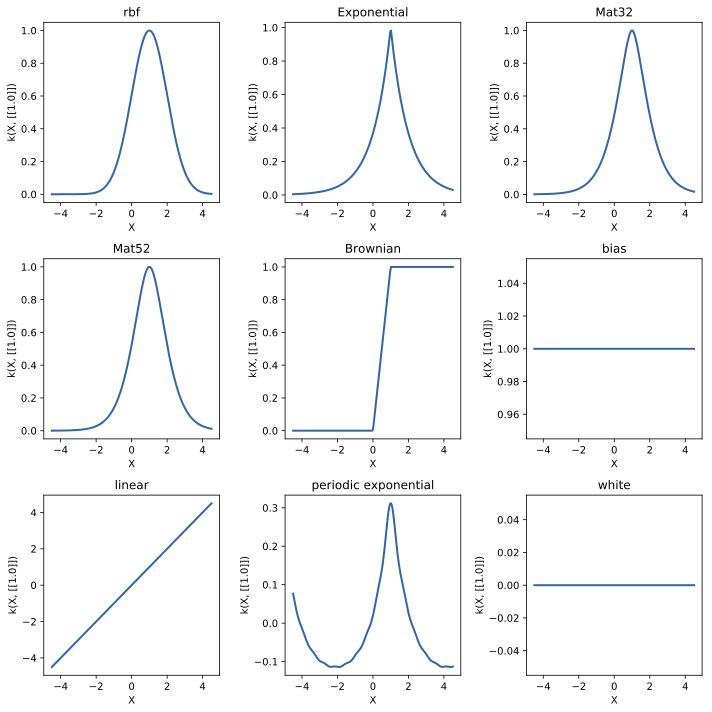

In [8]:
figure, axes = plt.subplots(3,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), 
         GPy.kern.Exponential(1), 
         GPy.kern.Matern32(1), 
         GPy.kern.Matern52(1), 
         GPy.kern.Brownian(1), 
         GPy.kern.Bias(1), 
         GPy.kern.Linear(1), 
         GPy.kern.PeriodicExponential(1), 
         GPy.kern.White(1)]
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=1)
    a.set_title(k.name.replace('_', ' '))

  mul.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        
  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        


 /Users/jingxixu/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


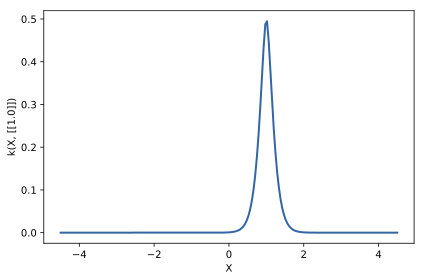

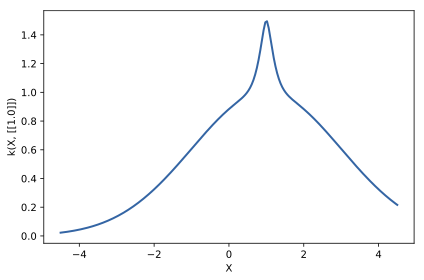

In [12]:
# Product of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_prod = k1 *k2
print(k_prod)
k_prod.plot()

# Sum of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_add = k1 + k2
print(k_add)
k_add.plot()

In [14]:
print(k1, '\n')
k_add.rbf.variance = 12.
print(k1)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |         

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


 /Users/jingxixu/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/contour.py:960: UserWarning:The following kwargs were not used by contour: 'linewidth', 'label'


 /Users/jingxixu/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


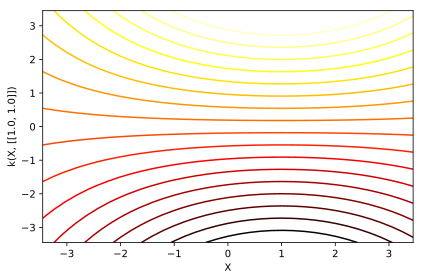

In [4]:
# works on the first column of X, index=0
k1 = GPy.kern.Linear(input_dim=1, active_dims=[0]) 
# works on the second column of X, index=1
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[1]) 
k = k1 * k2
k.plot(x=np.ones((1,2)))

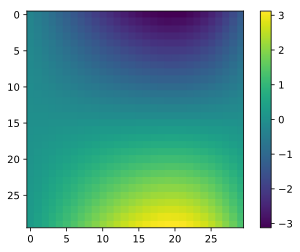

In [5]:
def plot_sample(k):
    xx, yy = np.mgrid[-3:3:30j, -3:3:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    #plt.contourf(xx, yy, s.reshape(*xx.shape), cmap=plt.cm.hot)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest')
    plt.colorbar()
plot_sample(k)

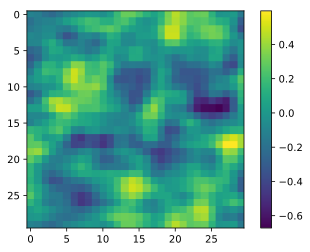

In [6]:
## This needs python 2.7 (env py27) and I do not understand why
k1 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[0], period=6, lower=-10, upper=10)# + GPy.kern.Bias(1, variance=0, active_dims=[0])
k2 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[1], period=8, lower=-10, upper=10)# + GPy.kern.Bias(1, variance=0, active_dims=[0])

#k2 = GPy.kern.ExpQuad(1, active_dims=[1])
k = k1 * k2
plot_sample(k)